# **Increasing Employee Retention at Salifort Motors**

## Description and deliverables

**Goal:** Analyze the provided dataset and build predictive models that can provide insights to the Human Resources (HR) department of Salifort Motors, a fictional large consulting firm. 

**Deliverables:**
1. One-page executive summary that would be presented to external stakeholders.
2. Complete code python notebook

# **PACE stages**
Throughout this project, you'll see references to the problem-solving framework, PACE. This notebook components are labeled with the respective PACE stages: Plan, Analyze, Construct, and Execute. 

# **Pace: Plan Stage**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company and answer the question: **"What's likely to make the employee leave the company?"** 

They surveyed a sample of employees, but now they don't know what to do with the collected data. As a data professional, HR asked for help with the following goals in mind:
1. Analyze the data
2. Build a model that predicts whether or not an employee will leave the company
3. Provide data-driven suggestions to improve employee retention

The reason for the predictive model is that if the model can predict employees who are likely to quit, it is also possible to identify factors that contribute to their leaving. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

### Familiarize yourself with the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# To save the fitted models
import pickle

# For nested CV
from sklearn.model_selection import StratifiedKFold, cross_validate

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration 

- Understand variables
- Clean the dataset (missing data, redundant data, outliers)

### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.rename(columns= {'average_montly_hours': 'average_monthly_hours',
                     'Work_accident': 'work_accident',
                     'promotion_last_5years': 'promotion_last_5_years',
                     'time_spend_company': 'tenure',
                     'Department': 'department'}, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [8]:
# Check for missing values
df0.isna().any(axis=1).sum()

0

> There are no missing values

### Check duplicates

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


> There are 3,008 rows of duplicated data. Since the dataset is composed of several continuous variables and discrete variables, the likelihood of two or more employees having the same exact information in all the columns in the dataset is extremely low. So it is reasonable to drop duplicates.  

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
# Save a copy of the clean dataset
df.to_csv('cleaned_hr_dataset.csv', index=False, header=list(df.columns))

# **pAce: Analyze Stage**
* Perform Exploratory Data Analysis (EDA) to analyze relationships between variables

#### Understanding how many employees left and what percentage of all employees this figure represents:

In [14]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


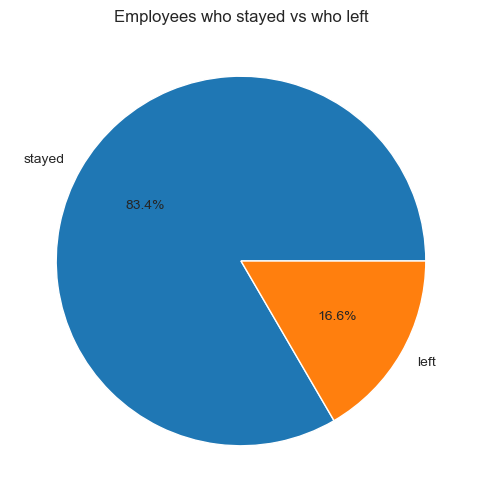

In [18]:
data = df['left'].value_counts()
labels = ['stayed', 'left']
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Employees who stayed vs who left')
plt.savefig('left_distribution.png')
plt.show()


> Less than 17% (1,991 out of 11,991) of employees left the company.
> Note that the dataset is imbalanced but not extremely so. It can be modeled without any class rebalancing (i.e., upsampling)

### **Checking the distribution of each columns**

In [150]:
# Helper function for boxplots and histograms
def distribution_plotter(column_str, median_text=True, **kwargs):
    fig, axes = plt.subplots(1,2,figsize=(10,4))
    
    sns.boxplot(x=df[column_str], ax=axes[0])
    axes[0].set_title(f'{column_str} boxplot')

    median = round(df[column_str].median(),1)
    sns.histplot(x=df[column_str], **kwargs, ax=axes[1])
    plt.axvline(x=median, color='red', linestyle='--')
    if median_text == True:
        axes[1].text(0.25, 0.85, f'median={median}', color='red',
                    ha='left', va='top', transform=axes[1].transAxes)
    else:
        print(f'Median: {median}')
    axes[1].set_title(f'{column_str} histogram')


    plt.tight_layout()

#### **`satisfaction_level`**
The employee's self-reported satisfaction level [0-1]

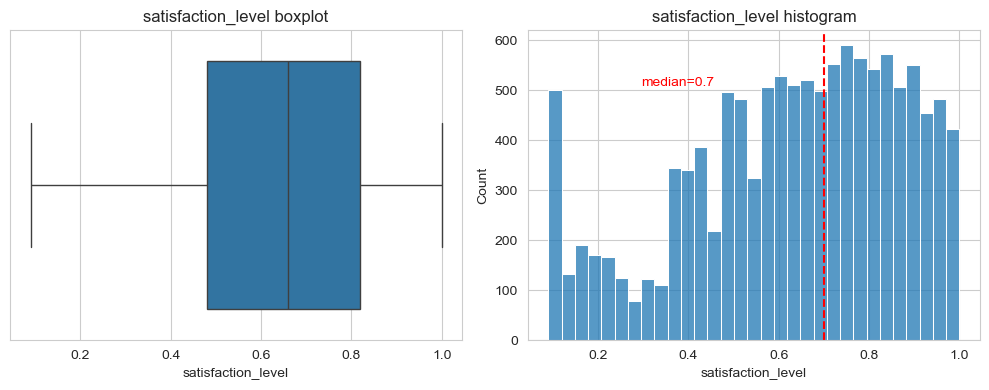

In [151]:
distribution_plotter('satisfaction_level', median_text=True)

> The median satisfaction level is 0.7. However, there are ~900 employees reported a very low satisfaction level of 0.2. 

#### **`last_evaluation`**
Score of employee's last performance review [0-1]

Median: 0.7


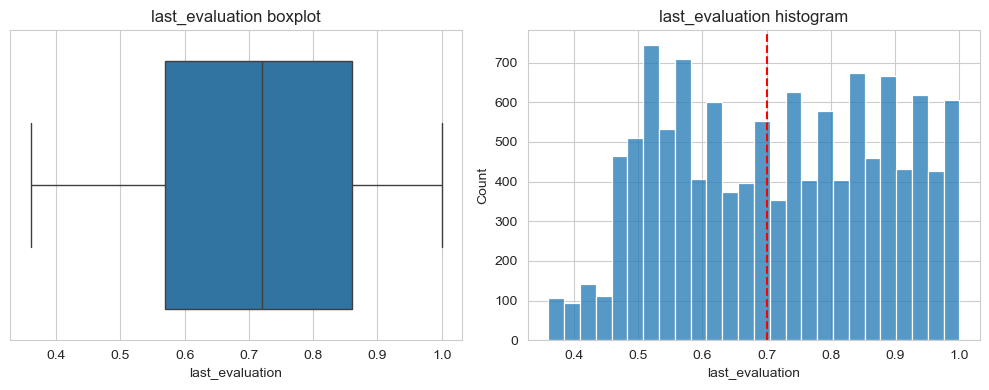

In [152]:
distribution_plotter('last_evaluation', median_text=False)

#### **`number_project`**
Number of projects employee contributes to 

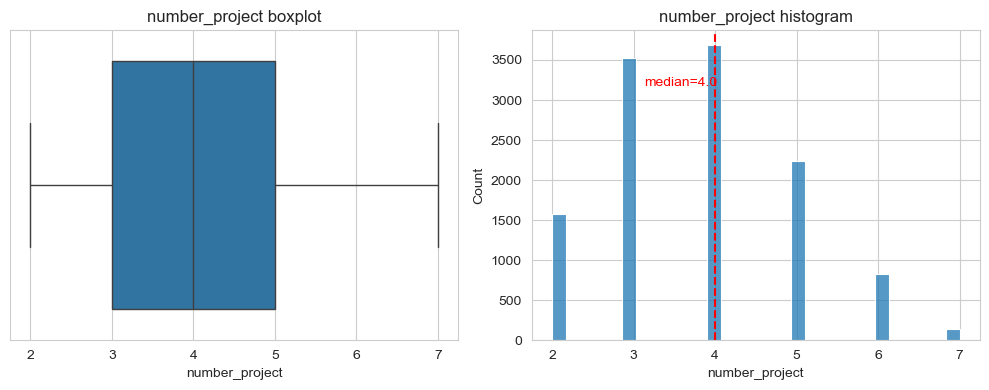

In [153]:
distribution_plotter('number_project')

#### **`average_monthly_hours`**
Average number of hours employees worked per month

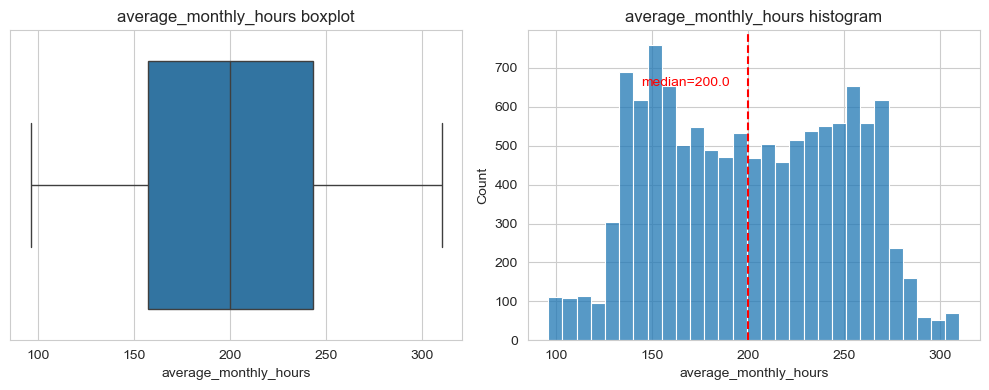

In [154]:
distribution_plotter('average_monthly_hours')

> The median monthly working hours is 200, well above the average working hours in the United States which is somewhere between 160 to 176 hours (assuming an employee works eight hours a day with a 20 to 22 working days in a month). 

#### **`tenure`**
How long the employee has been with the company (years)

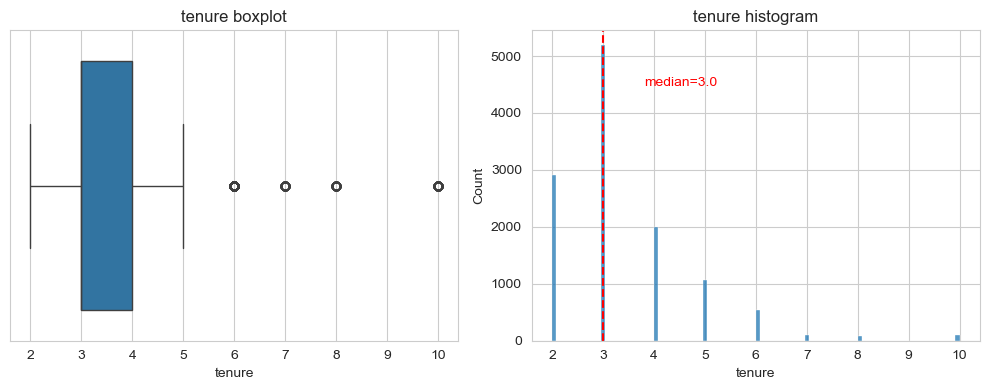

In [155]:
distribution_plotter('tenure')

> The median employee tenure is 3 years. However, there are employees who have been with the company for 6 to 10 years, which shows in the boxplot as outliers.

> Based on the type of model that will be used, outliers may or may not be removed. For instance, linear models such as logistic regression are more sensitive to outliers than tree-based models.  

In [156]:
# Determine the number of rows containing outliers

# Calculate the 25th and 75th percentile
percentile25 = df['tenure'].quantile(0.25)
percentile75 = df['tenure'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
lower_limit = percentile25 - (1.5*iqr)
upper_limit = percentile75 + (1.5*iqr)

# Show only the outliers
outliers = df[(df['tenure']<lower_limit) | (df['tenure']>upper_limit)]
outliers.shape

(824, 10)

> There are 824 outliers in the dataset

In [157]:
def outlier_identifier(column_name):
    '''
    Returns a DataFrame with only outliers of the corresponding data column.
    
    Input:    Data column
    Output:   Outlier dataframe
    '''
    percentile25 = df[column_name].quantile(0.25)
    percentile75 = df[column_name].quantile(0.75)
    iqr = percentile75 - percentile25
    lower_limit = percentile25 - (1.5*iqr)
    upper_limit = percentile75 + (1.5*iqr)
    outliers = df[(df[column_name]<lower_limit) | (df[column_name]>upper_limit)]
    
    return outliers


outlier_identifier('tenure')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


#### **`work_accident`**
Whether or not the employee experienced an accident while at work

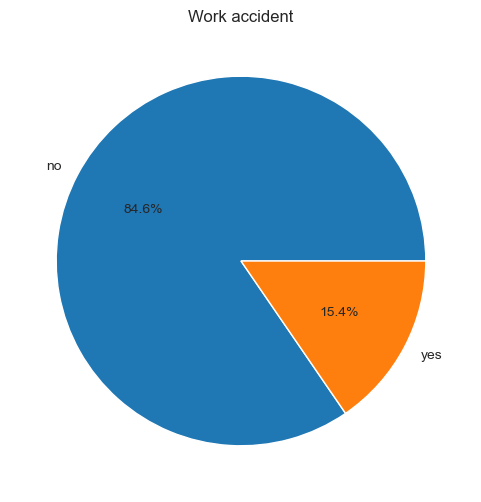

In [158]:
data = df['work_accident'].value_counts()
labels = ['no', 'yes']
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Work accident')
plt.show()

#### **`promotion_last_5_years`**
Whether or not the employee was promoted in the last 5 years

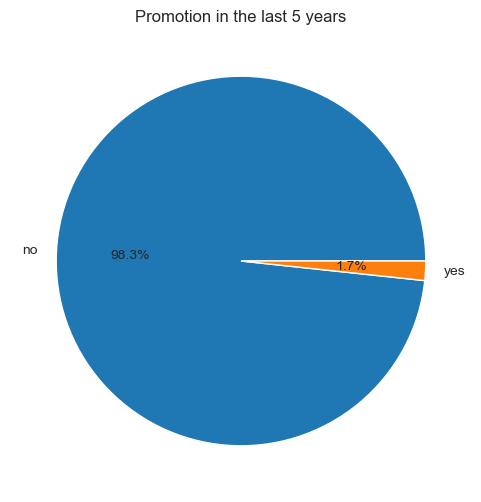

In [159]:
data = df['promotion_last_5_years'].value_counts()
labels = ['no', 'yes']
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Promotion in the last 5 years')
plt.show()

> Only 1.7% (203 out of 11, 788) of the employee were promoted in the last 5 years. 

#### **`department`**
The employee's deparment

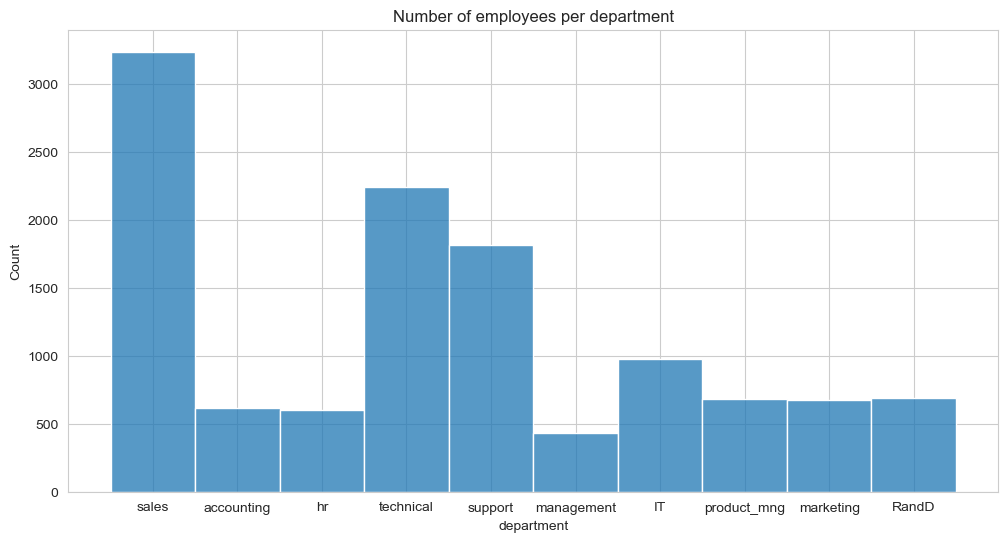

In [160]:
plt.figure(figsize=(12,6))
fig = sns.histplot(x=df['department'])
fig.set_title('Number of employees per department')
plt.show;

#### **`salary`**
The employee's salary (low, medium, high)

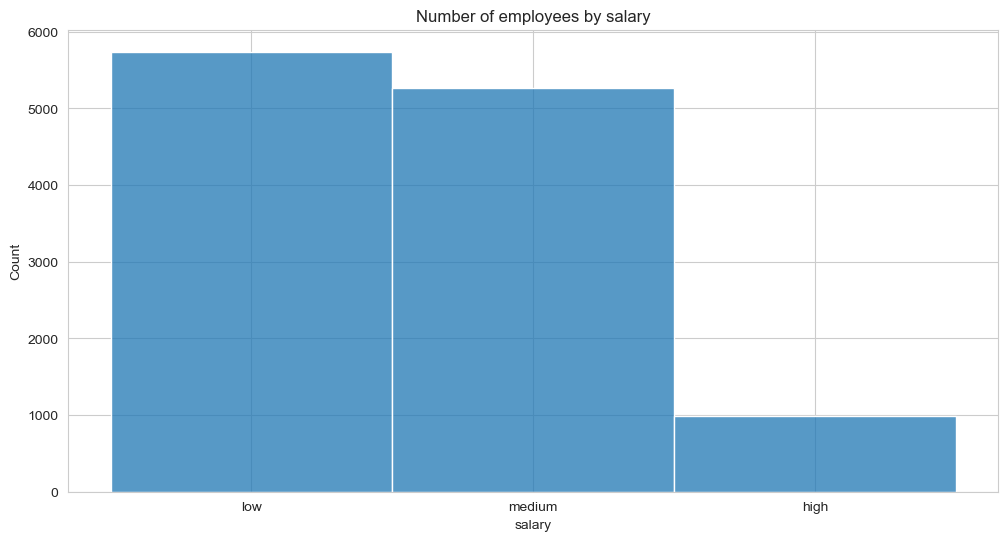

In [161]:
plt.figure(figsize=(12,6))
fig = sns.histplot(x=df['salary'])
fig.set_title('Number of employees by salary')
plt.show;

### Checking the relationship between variables:

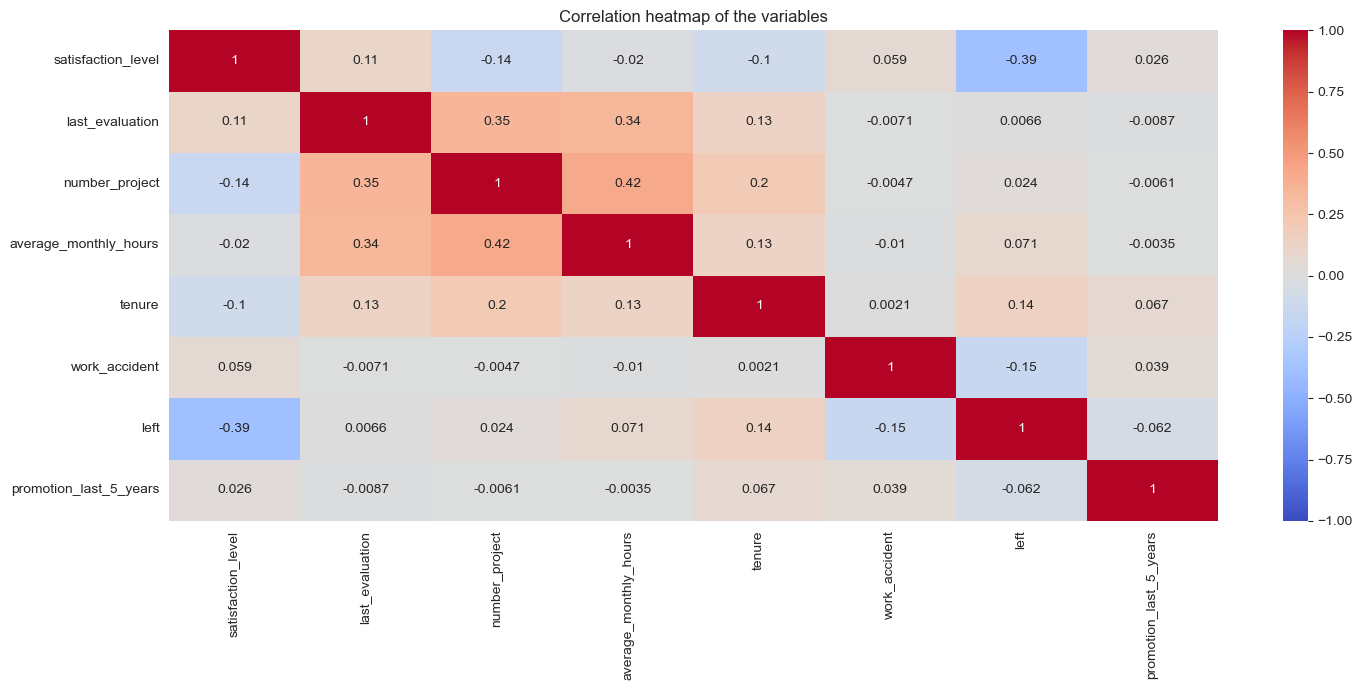

In [162]:
# Correlation heatmap using the original data
plt.figure(figsize=(15,7))
fig = sns.heatmap(df0.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1,
                 annot=True, cmap='coolwarm')
fig.set_title("Correlation heatmap of the variables")
plt.tight_layout()
plt.savefig('correlation heatmap.png')
plt.show();

> Based on the correlation heatmap, `number_of_project,` `last_evaluation,` and `average_monthly_hours` have a moderate positive correlation to each other.
>
> Also, whether an employee left or stayed is based largely on the `satisfaction_level`.  
> **Note:** `satisfaction_level` might be a potential source of data leakage.

#### **`average_monthly_hours`** vs **`number_projects`**

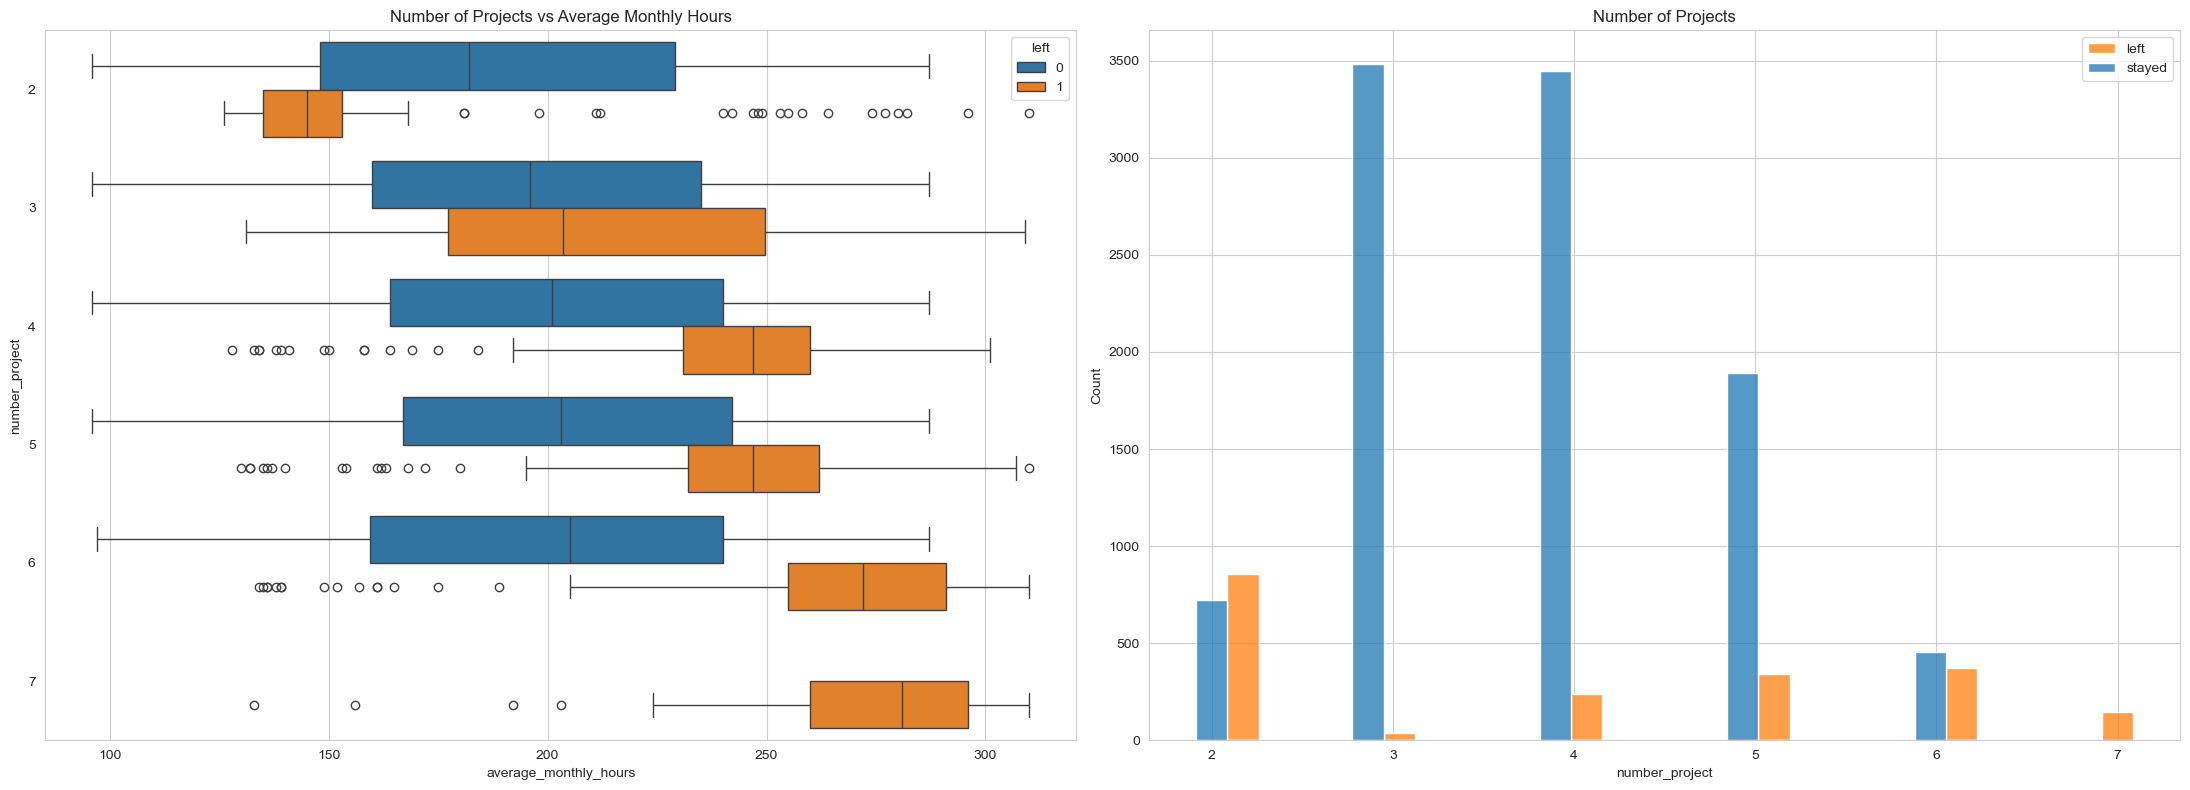

In [163]:
# `average monthly hours` vd `number of projects` 
fig, axes = plt.subplots(1, 2, figsize=(22,8))
sns.boxplot(x=df['average_monthly_hours'], y=df['number_project'], hue=df['left'], orient='h', ax=axes[0])
axes[0].set_title('Number of Projects vs Average Monthly Hours')

sns.histplot(x=df['number_project'], hue= df['left'], multiple='dodge', shrink=2, ax=axes[1])
axes[1].set_title('Number of Projects')
plt.legend(labels=['left', 'stayed'])
plt.tight_layout()

plt.show();

In [164]:
pd.DataFrame(df.groupby(['number_project'])['left'].value_counts())

count
number_project left       
2              1       857
               0       725
3              0      3482
               1        38
4              0      3448
               1       237
5              0      1890
               1       343
6              0       455
               1       371
7              1       145

> Naturally, the average monthly hours increase with an increasing number of projects assigned to the employee. However, there are a few things that stand out from these graphs:
>  
> 1. Assuming a 40-hour work week and with two weeks of vacation per year, the average monthly hours of an employee working Monday to Friday should be = `40 hours per week * 50 weeks) / 12 months` = `166.67 hours`. Every group in the boxplot, aside from the employees who worked on two projects&mdash;worked more hours than the assumed average monthly working hours. It seems that the employees in this company are overworked.
> 
> 2. There are two groups of employees who left:       
> * *Group A. Those who work fewer hours than their peers with the same number of projects*: may include employees who were fired and/or employees who are rendering and were just given lesser number of projects. 
> * *Group B. Those who work longer hours than their peers with the same number of projects*: may include employees who quit.
>
> 3. All employees who were assigned with 7 projects left the company. The average monthly working hours for this group and those with 6 projects who left the company, `255-295 hours`, are far higher than other groups in the boxplot. 
>
> 4. The ratio of employees who left vs. stayed is the lowest in employees with 3-4 projects(`3 projects: 38 left vs. 3,482 stayed, 4 projects: 237 left vs. 3,448 stayed`). It seems to be the ideal number of projects that should be assigned to employees. 

#### **`number_project`** vs **`satisfaction_level`**

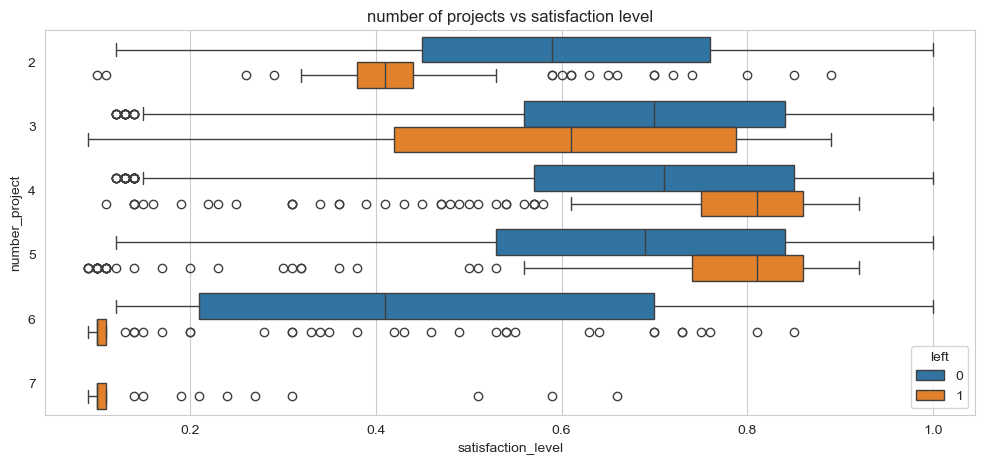

In [165]:
# Number of projects vs satisfaction level 
plt.figure(figsize=(12,5))
fig = sns.boxplot(x=df['satisfaction_level'], y=df['number_project'], hue=df['left'], orient='h')
fig.set_title('number of projects vs satisfaction level')
plt.show();

In [166]:
satis = df[(df['number_project']==7) & (df['left']==1)]
satis[df['satisfaction_level'] > 0.6]

C:\Users\marco\AppData\Local\Temp\ipykernel_11312\575138092.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  satis[df['satisfaction_level'] > 0.6]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
843,0.66,0.47,7,156,2,0,1,0,management,medium


> Types of employees who left based on number of projects and satisfaction level: 
>> * *Those who reported higher satisfaction levels than their peers with the same number of projects*: (i.e. employees with 4-5 projects that reported high satisfaction level, `~0.75-0.90`.  
>> * *Those who reported lower satisfaction levels than their peers with the same number of projects*
> 
> * **The employees with 7 projects all left the company and reported a low satisfaction level of less than 0.6, except for one employee with a satisfaction level of 0.66.**

#### **`average_monthly_hours`** vs **`last_evaluation`**

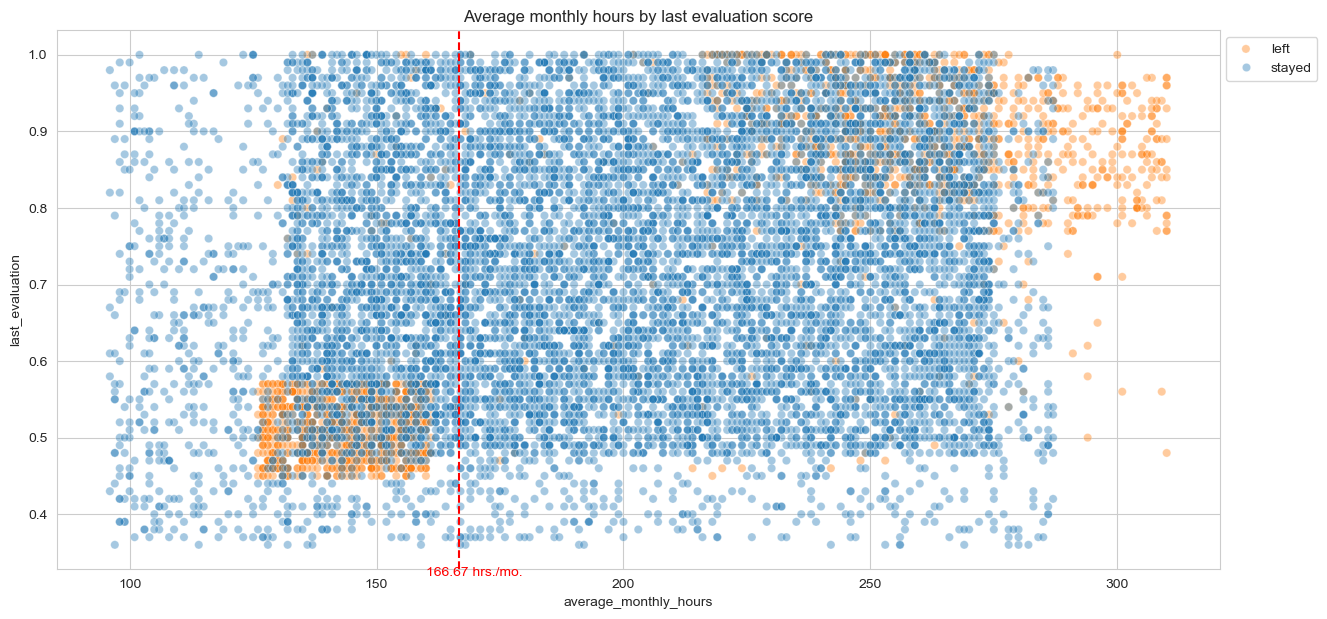

In [167]:
# average monthly hours vs last evaluation score
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', linestyle='--')
plt.legend(labels=['left', 'stayed'], bbox_to_anchor=(1,1))
plt.text(160, 0.32, f'166.67 hrs./mo.', color='red')
plt.title('Average monthly hours by last evaluation score')
plt.show();

> * Working longer hours doesn't guarantee a high evaluation score.
>
> * There seems to be a correlation between monthly working hours and evaluation score.
> 
> * Most of the employees work well over the  nominal monthly average of 166.67 hours.
> 
> * Types of employees *who left* based on last evaluation score and average monthly hours:
>> * Employees with high evaluation scores and who worked longer hours than most employees.
>> * Employees with low evaluation scores and who worked shorter hours than the nominal monthly average of 166.67 hours.

#### **`average_monthly_hours`** vs **`satisfaction_level`**

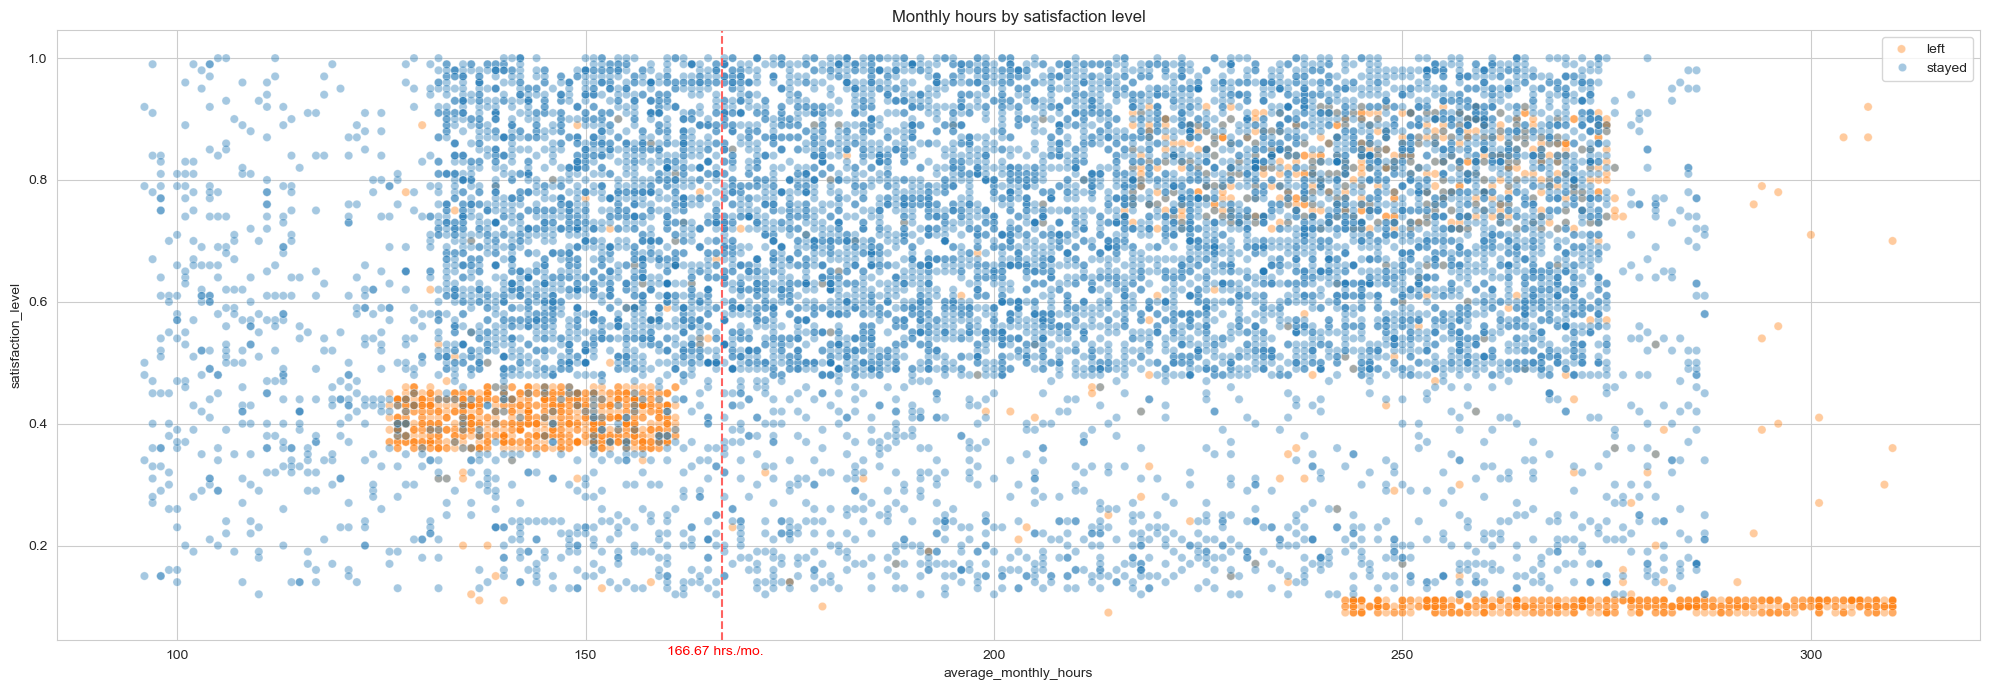

In [168]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(20, 7))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'], bbox_to_anchor=(1,1))
plt.text(160, 0.02, f'166.67 hrs./mo.', color='red')
plt.title('Monthly hours by satisfaction level')
plt.tight_layout()
plt.show();

In [169]:
df[df['satisfaction_level'] < 0.6].shape

(4883, 10)

> More employees reported satisfaction levels of greater than 0.6.
>
> Types of employees who left the company based on satisfaction level and average monthly working hours:
>> * **Those who reported very low satisfaction levels (*less than 0.2*) **and** who worked significantly longer hours than most employees (*between ~240-315 hours per month*):** The low satisfaction level might be because of working around ~60-78 hours per week.
>>   
>> * **Those who reported very high satisfaction levels (*greater than 0.7*) **and** who worked significantly longer hours than most employees (*~210-280 hours per month*)**.
>>
>> * **Those who reported lower satisfaction levels (*around 0.35 to 0.5*) **and** who had more normal working hours:** It is hard to assume the reason why they left, but it is possible that they felt pressured to work more, considering so many of their workmates worked more. And that pressure could have lowered their satisfaction. 

#### **`department`** vs **`left`**

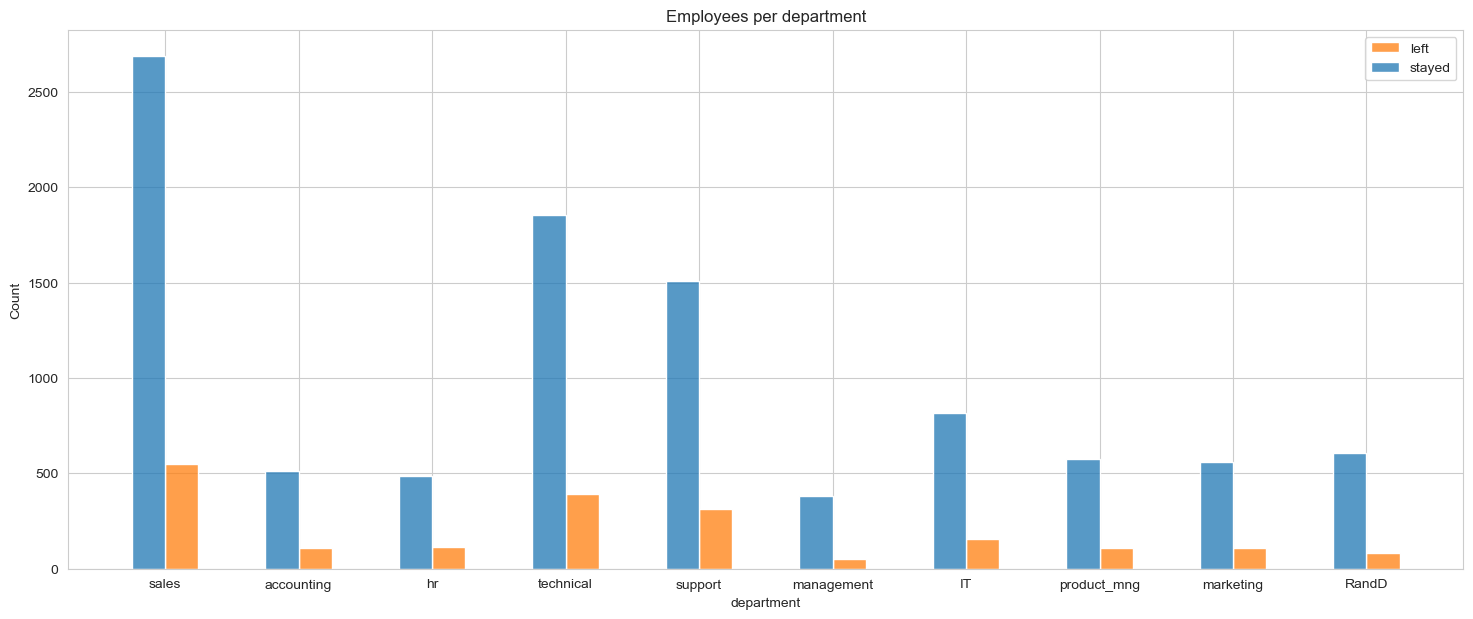

In [170]:
# Employees left/stayed per department
plt.figure(figsize=(18, 7))
fig = sns.histplot(x=df['department'], hue= df['left'], multiple='dodge', 
                   discrete=1, hue_order=[0,1], shrink=.5)
fig.set_title('Employees per department')
plt.legend(labels=['left', 'stayed'])
plt.show()

In [171]:
pd.DataFrame(df.groupby(['department'])[['left']].value_counts(normalize=True))

proportion
department  left            
IT          0       0.838115
            1       0.161885
RandD       0       0.877522
            1       0.122478
accounting  0       0.824477
            1       0.175523
hr          0       0.811980
            1       0.188020
management  0       0.880734
            1       0.119266
marketing   0       0.833581
            1       0.166419
product_mng 0       0.839650
            1       0.160350
sales       0       0.830195
            1       0.169805
support     0       0.828666
            1       0.171334
technical   0       0.826203
            1       0.173797

> There is no department that differs significantly in its proportion of employees who left. 

#### **`salary`** vs **`left`**

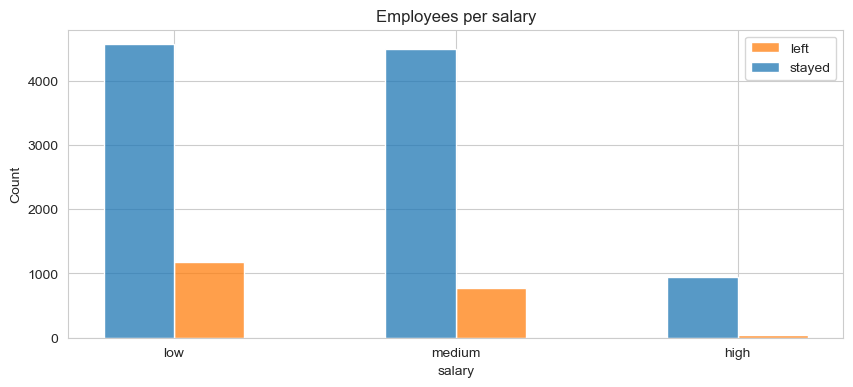

In [172]:
# Employees left/stayed vs salary
plt.figure(figsize=(10, 4))
fig = sns.histplot(x=df['salary'], hue= df['left'], multiple='dodge', 
                   discrete=1, hue_order=[0,1], shrink=.5)
fig.set_title('Employees per salary')
plt.legend(labels=['left', 'stayed'])
plt.show()

In [173]:
pd.DataFrame(df.groupby(['salary'])[['left']].value_counts(normalize=True))

proportion
salary left            
high   0       0.951515
       1       0.048485
low    0       0.795470
       1       0.204530
medium 0       0.853830
       1       0.146170

In [174]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

> Lower-paid employees had the highest turnover rate; 1,174 out of 5,740 (20%) lower-paid employees left the company. In comparison, 48 out of 990 higher-paid employees (4%) left the company. 

#### **`satisfaction`** vs **`tenure`**

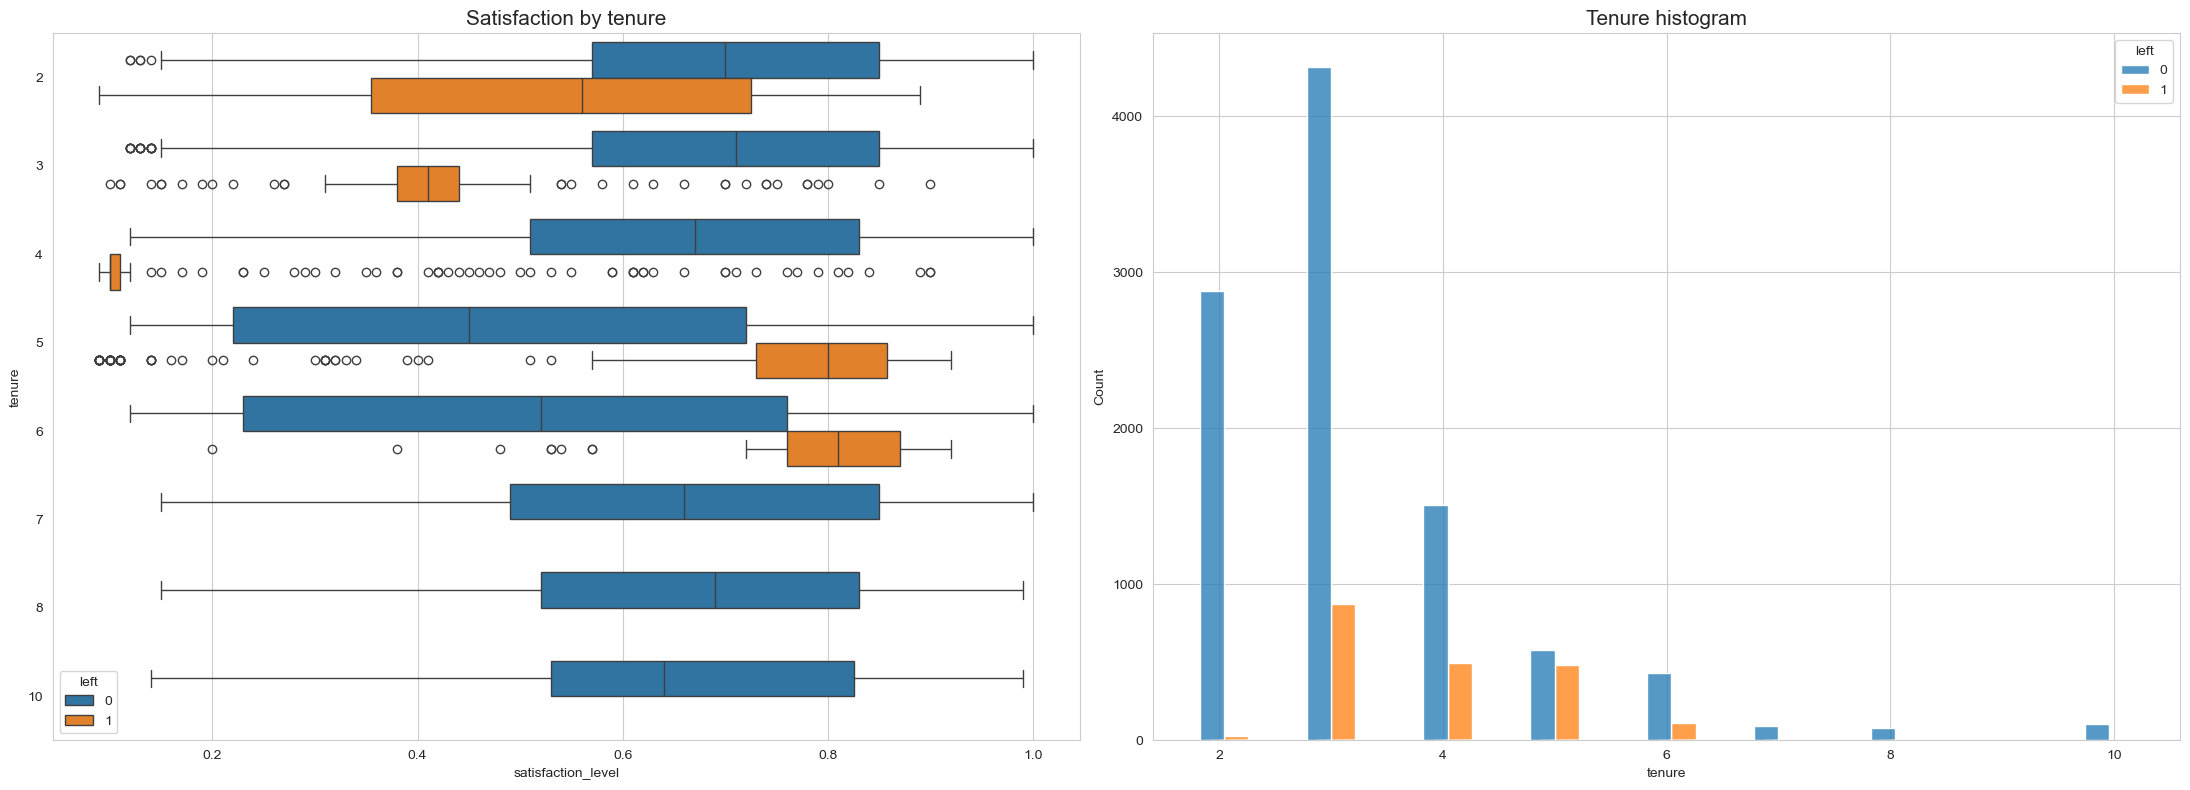

In [177]:
fig, axes=plt.subplots(1, 2, figsize=(22,8))

# Boxplot showing distributions of satisfaction level by tenure, comparing employees who left/stayed
sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=axes[0])
axes[0].set_title('Satisfaction by tenure', fontsize='15')

# Create histogram showing distribution of tenure, comparing employees who left vs stayed
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=axes[1])
axes[1].set_title('Tenure histogram' , fontsize='15')

plt.tight_layout()
plt.show()

> * There are two types of employees who left the company: dissatisfied employees with shorted tenures (2-4 years) and satisfied employees with medium-length tenures (5-6).
> 
> * The four-year tenured employees who left reported abnormally low satisfaction levels. It is worth investigating any change in company policy that might have affected people precisely at the four-year mark, if possible.
> 
> * People who have been with the company for over six years tend to stay. Also, their satisfaction levels are aligned with those of newer employees who stayed.
> 
> * The histogram shows that there are relatively few longer-tenured employees. It is possible that they are higher-ranking and higher-paid employees. 

#### **`tenure`** vs **`salary`**:
Comparing long-tenured versus short-tenured employees based on their salaries.

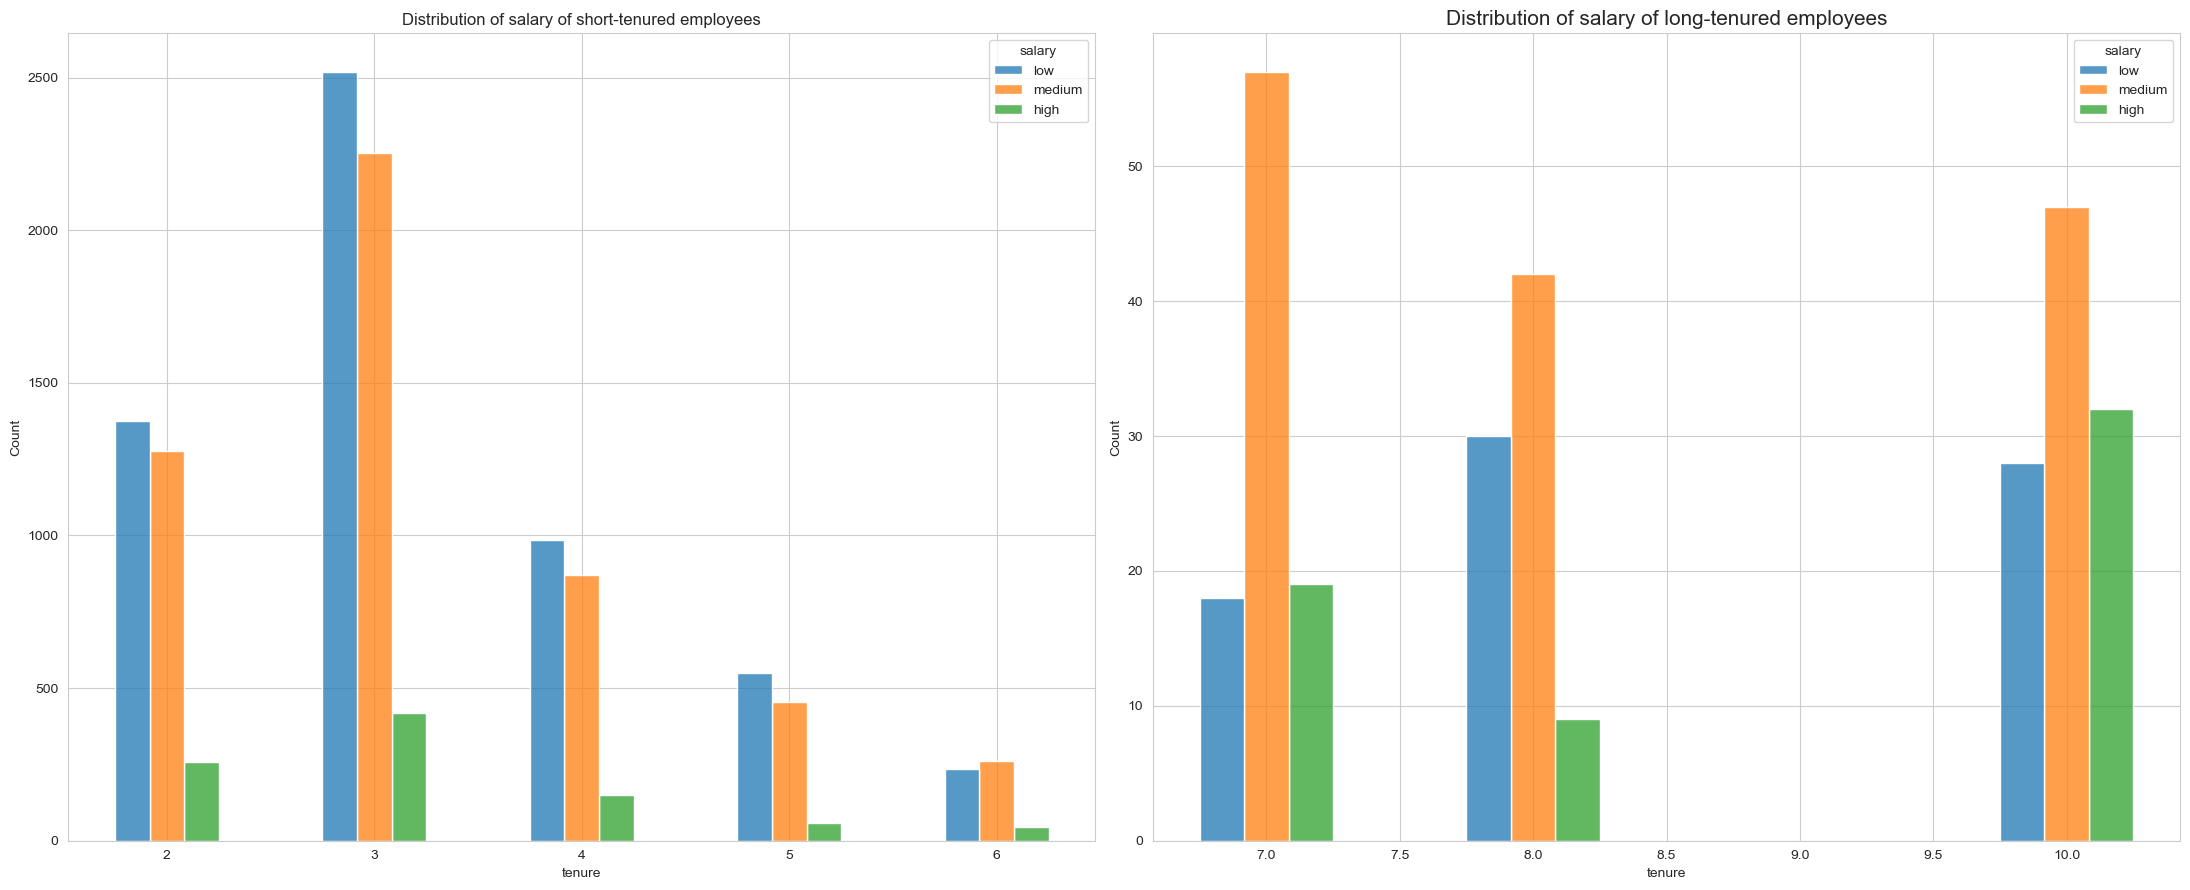

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(22,9))
sns.histplot(x=short_tenured['tenure'], hue=df['salary'], discrete=True,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=axes[0])
axes[0].set_title('Distribution of salary of short-tenured employees')

sns.histplot(x=long_tenured['tenure'], hue=df['salary'], discrete=True,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=axes[1])
axes[1].set_title('Distribution of salary of long-tenured employees', fontsize='15')
plt.tight_layout()
plt.show()

In [175]:
short_tenured = df[df['tenure']<= 6]
long_tenured = df[df['tenure']> 6]
print(long_tenured.shape)
print(short_tenured.shape)

(282, 10)
(11709, 10)


> 2.35% (282 out of 11,991 employees) have been with the company for 7 or more years.

> Long-returned employees include a mix of different salary levels rather than being skewed toward the higher end of the pay scale. 

#### **`average_monthly_hours`** vs **`promotion_last_5_years`**

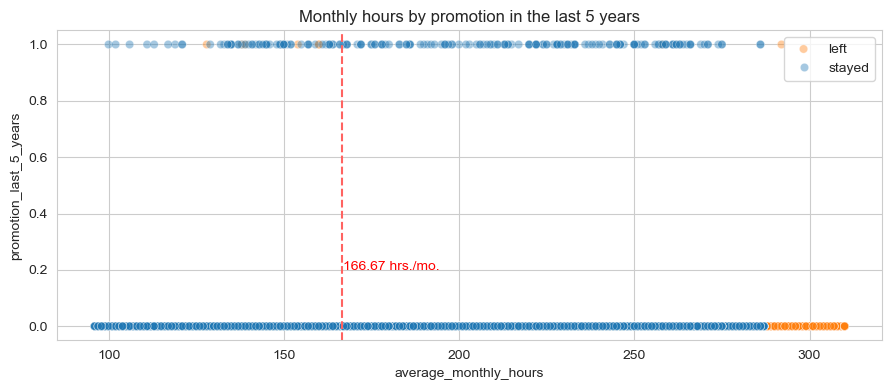

In [178]:
# Create scatterplot of `average_monthly_hours` versus `promotion_last_5b_years`, comparing employees who stayed versus those who left
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5_years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'], bbox_to_anchor=(1,1))
plt.text(167, 0.2, f'166.67 hrs./mo.', color='red')
plt.title('Monthly hours by promotion in the last 5 years')
plt.tight_layout()
plt.show();

> * Very few employees (203 out of 11,991) were promoted in the last five years.
>> Very few employees who worked longer hours were promoted. 
> * Very few employees who were promoted in the last five years left the company
>
> * Employees who worked longer hours than most employees and were not promoted in the last five years left the company.

#### **`satisfaction_level`** vs **`left`**:
comparing the mean and median satisfaction score of employees who left vs who stayed

In [179]:
# mean and median satisfaction score of employees who left/stayed
df.groupby(['left'])['satisfaction_level'].agg(['median', 'mean'])

,median,mean
left,,
0,0.69,0.667365
1,0.41,0.440271


> The median and mean satisfaction level for employees who left is lower than those of employees who stayed in the company.

> As shown in the graph below, the distribution of the satisfaction level of the *employees who stayed in the company* is left skewed, showing that the mean score is less than the median score.

In [180]:
# mean and median satisfaction score of employees who left/stayed
median = df.groupby(['left'])['satisfaction_level'].median()[0]
mean = df.groupby(['left'])['satisfaction_level'].mean()[0]

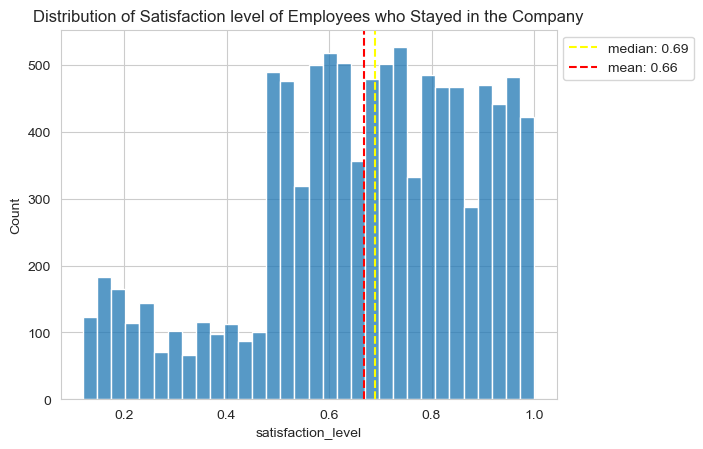

In [181]:
sns.histplot(x=df[df['left']==0]['satisfaction_level'])
plt.title('Distribution of Satisfaction level of Employees who Stayed in the Company')
plt.axvline(x=median, color='yellow', label='median: 0.69', ls='--')
plt.axvline(x=mean, color='red', label='mean: 0.66', ls='--')
plt.legend(bbox_to_anchor=(1,1))
plt.show();

### Change categorical predictors to numeric variables

In [184]:
# Copy the df 
df_enc = df.copy()

In [185]:
# salary: use label encoding because there is a hierarchy
df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(
    ['low', 'medium', 'high']).cat.codes

# department: use one-hot encoding because there is no hierarchy
df_enc = pd.get_dummies(df_enc, drop_first=False, dtype='int')

In [186]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure                  11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   salary                  11991 non-null  int8   
 9   department_IT           11991 non-null  int32  
 10  department_RandD        11991 non-null  int32  
 11  department_accounting   11991 non-null  int32  
 12  department_hr           11991 non-null  int32  
 13  department_management   11991 non-null  int32  
 14  department_marketing    11991 non-null  int

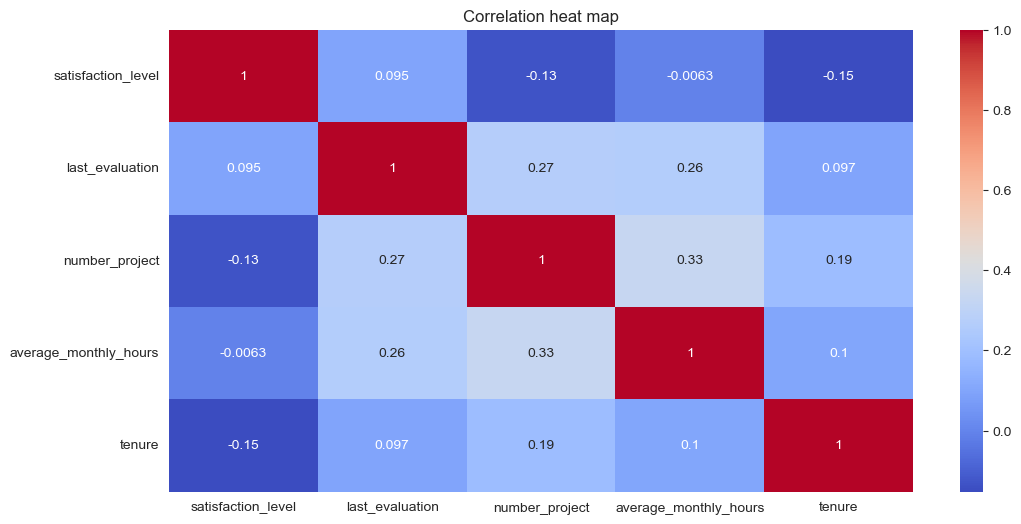

In [187]:
plt.figure(figsize=(12,6))
fig = sns.heatmap(data=df_enc[['satisfaction_level','last_evaluation','number_project','average_monthly_hours', 'tenure']].corr(method='pearson'), annot=True, cmap='coolwarm')
fig.set_title('Correlation heat map')
plt.show()

### Insights
* Overall, it appears that employees are leaving the company as a result of poor management. 
* Leaving is tied to longer working hours, many project, and generally lower satisfaction levels.
* It can be ungratifying to work long hours and not receive promotions or good evaluation scores.
* There is a sizeable group of employees at this company who are probably burned out.
* It also appears that if an employee has spent more than size years at the company, they tend to not leave.


# **paCe: Construct Stage**
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

> The target variable, which will be determined using the X predictor variables, is categorical and is binary: `0 for employees who stayed` and `1 for employees who left the company`. This task involves **classification**. 

### Identify the types of models most appropriate for this task.

The models that are most appropriate for this task are: 
* Binomial Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* XGBoost Classifier

### Identify the evaluation metrics to evaluate the models.
* **ROC_AUC:** AUC is the area under the ROC curve; it is also considered the probability that the model ranks a random positive example more highly than a random negative example.  
> It tells how much the model is capable of distinguishing between the two classes: left (1), stayed(0).
>> The higher the AUC, the better the model is at distinguishing between employees who will leave or who will stay in the company.  

### **Model assumptions: Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

### Modeling workflow and model selection process: using Nested Cross-validation

Why chose model selection with nested cross-validation from scikit-learn.org:
> Model selection without nested cross-validation uses the same data to tune model parameters and evaluate model performance. Information may thus "leak" into the model and overfit the data.

To avoid this problem, a nested cross-validation will be used:  

![see diagram](nested-cross-validation-diagram.png)   
* The training folds from the outer loop will be used in the inner loop for model tuning
* The inner loop selects the best hyperparameter setting
* The best hyperparameter setting can be evaluated on both the average over the inner test folds and the one corresponding test fold of the outer loop.
  


#### Model Selection workflow: 
1. Split the data into train and test sets (80/20)
2. Execute the nested cross-validation
3. Select the champion model based on its performance on the outer loop of nested cross-validation.
4. Get the best parameters of the champion model using GridSearchCV
5. Train the champion model using the entire train set
6. Assess the champion model's performance on the test set

### Modeling Round 1: Including all variables as features

In [190]:
df = df_enc.copy()

In [191]:
# Split the data into train and test sets (80/20)
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

for x in [X_train, X_test, y_train, y_test]:
    print(len(x))

9592
2399
9592
2399


In [89]:
# Initialize the models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 

In [108]:
# setting up the parameter grids
param_grid_lr = [{'penalty' : ['l2', 'none'],
                  'solver' : ['lbfgs','newton-cholesky'],
                  'max_iter' : [1000, 5000]}]

param_grid_dt = [{'max_depth': [4, 10, None],
                  'min_samples_leaf': [2, 5, 10],
                  'min_samples_split': [2, 4],
                  'criterion': ["gini", "entropy"]}]

param_grid_rf = [{'max_depth': [3, 6, None], 
                  'max_features': [1.0],
                  'max_samples': [0.7, 1.0],
                  'min_samples_leaf': [1, 3],
                  'min_samples_split': [2,4],
                  'n_estimators': [300, 500]}]

param_grid_xgb = [{'max_depth': [5, 10, None],
                   'min_child_weight': [2, 3, 5], 
                   'learning_rate': [0.01, 0.1],
                   'n_estimators': [300, 500]}]

In [109]:
# Tune the hyperparameters of the models in the inner loop
# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for pgrid, est, name in zip((param_grid_lr, param_grid_dt,
                             param_grid_rf, param_grid_xgb),
                            (lr, dt, rf, xgb),
                            ('LogReg', 'DTree', 'RForest', 'XGBoost')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                       n_jobs=-1,
                       cv=inner_cv,
                       verbose=0,
                       refit='roc_auc')
    gridcvs[name] = gcv

In [110]:
# Outer loop for model selection 
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for name, gs_est in sorted(gridcvs.items()):
    scores_dict = cross_validate(gs_est, 
                                 X=X_train, 
                                 y=y_train, 
                                 scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                 cv=outer_cv,
                                 return_estimator=True,
                                 n_jobs=-1)

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('    Inner loop:')
    
    
    for i in range(scores_dict['test_roc_auc'].shape[0]):

        print('\n        Best ROC-AUC (avg. of inner test folds) %.2f%%' % (scores_dict['estimator'][i].best_score_ * 100))
        print('        Best parameters:', scores_dict['estimator'][i].best_estimator_)
        print('        ROC-AUC (on outer test fold) %.2f%%' % (scores_dict['test_roc_auc'][i]*100))

    print('\n%s | outer ROC-AUC %.2f%% +/- %.2f' % 
          (name, scores_dict['test_roc_auc'].mean() * 100, 
           scores_dict['test_roc_auc'].std() * 100))

    
    print(pd.DataFrame({'model': [name],
                        'precision': [scores_dict['test_precision'].mean()],
                        'recall': [scores_dict['test_recall'].mean()], 
                        'F1': [scores_dict['test_f1'].mean()], 
                        'accuracy': [scores_dict['test_accuracy'].mean()], 
                        'roc_auc': [scores_dict['test_roc_auc'].mean()]
                        }))

-------------------------------------------------- 

Algorithm: DTree
    Inner loop:

        Best ROC-AUC (avg. of inner test folds) 97.07%
        Best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       random_state=42)
        ROC-AUC (on outer test fold) 96.50%

        Best ROC-AUC (avg. of inner test folds) 96.71%
        Best parameters: DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=42)
        ROC-AUC (on outer test fold) 97.11%

        Best ROC-AUC (avg. of inner test folds) 96.95%
        Best parameters: DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=42)
        ROC-AUC (on outer test fold) 98.00%

        Best ROC-AUC (avg. of inner test folds) 97.22%
        Best parameters: DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
        ROC-AUC (on outer test fold) 96.92%

        Best ROC-AUC (avg. of inner test folds) 97.05%
        Best paramete

> The evaluation scores (from the outer loop) of the XGBoost model are generally better than those of Logistic regression, Decision tree, and Random forest models. This indicates that the **XGBoost model** outperforms the other models. 

In [70]:
# Folder where the model will be saved
path = 'pickle_objects'

In [71]:
# Function to write the pickle
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [72]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model 

In [55]:
# Train the champion model using the whole train set
champion_xgb = GridSearchCV(estimator = xgb,
                              param_grid= param_grid_xgb,
                              scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                              n_jobs=-1,
                              cv=5,
                              verbose=1,
                              refit='roc_auc')

In [56]:
%%time
champion_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 3.3 s
Wall time: 35.4 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'max_depth': [5, 10, None],
                          'min_child_weight': [2, 3, 5],
                          'n_estimators': [300, 500]}],
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [67]:
# Write pickle 
write_pickle(path, champion_xgb, 'champion_xgb_round1')

In [192]:
# Read pickle
champion_xgb = read_pickle(path, 'champion_xgb_round1')

In [193]:
champion_xgb.best_score_

0.9859679690451401

In [194]:
champion_xgb.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 500}

In [200]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'roc_auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    roc_auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'roc_auc': [roc_auc]
                        })
  
    return table

In [201]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    roc_auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'roc_auc': [roc_auc]
                         })
  
    return table

In [202]:
# Assess the performance of the model during GridSearchCV (using the train set)
xgb_results = make_results('XGBoost_1 val', champion_xgb, 'roc_auc' )
xgb_results

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_1 val,0.975087,0.9096,0.941141,0.98113,0.985968


In [203]:
# Assess the performance of the model using the test set
XGB_test_scores = get_scores('XGBoost_1 test', champion_xgb, X_test, y_test)
XGB_test_scores

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_1 test,0.971053,0.927136,0.948586,0.983326,0.960819


In [204]:
# Summarizing the results
results = pd.concat([xgb_results, XGB_test_scores], axis=0)
results

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_1 val,0.975087,0.909600,0.941141,0.981130,0.985968
0,XGBoost_1 test,0.971053,0.927136,0.948586,0.983326,0.960819


> The test scores are quite similar to the validation scores, which is good. XGBoost model appears to be a strong model to predict employees who will leave the company. 

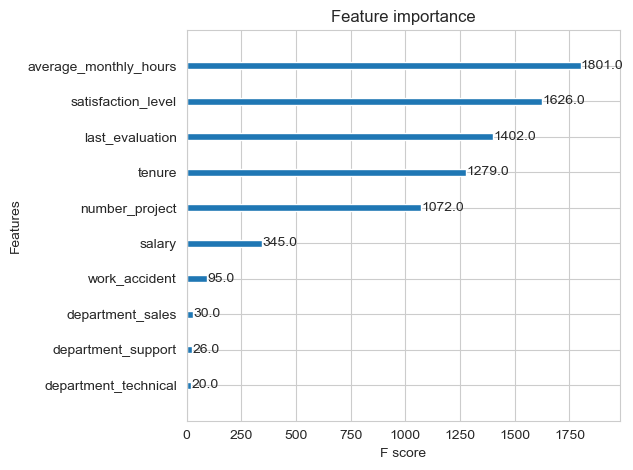

In [158]:
# Plot feature importance to reveal the strong predictors of the target variable
ax = plot_importance(champion_xgb.best_estimator_)
ax.figure.tight_layout()
ax.figure.savefig('feature_importance.png')

> The top 3 predictors of whether the employee will leave the company or not: `average_monthly_hours`, `satisfaction_level`, `last_evaluation`

### Modeling Round 2: Using Feature Engineering

#### Feature Engineering Round 1
The high evaluation scores from the model results might be due to the occurrence of data leakage.   

> Data leakage is when you use data to train your model that should not be used during training. Training a model with leaked data can give an unrealistic score that is not replicated in production.
> 
> Data leakage appears when:
> * When the data you're using to train contains information about what you're trying to predict
> * Introducing information about the target variable during training that would not legitimately be available during actual use. 

In this case, it would be possible that the company won't have `satisfaction levels` reported for all of its employees. The `average_monthly_hours` variable might also be a source of data leakage; if employees have already decided to quit or have already been identified by management as people to be terminated, they may be working fewer hours. 

In [205]:
# Drop the `satisfaction_level` column
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


##### Create an `overworked` column: 
As established during the EDA, 166.67 is approximately the ideal average number of monthly hours for an employee who works 50 weeks per year, 5 days per week, 8 hours per day. 

`overworked` column can be defined as working more than 175 hours per month on average with values of: 
* `True = 1`, if overworked
* `False = 0`, if not overworked

In [206]:
# Create an overworked column that is equal to the averge_monthly_hours
df2['overworked'] = df2['average_monthly_hours']

# Inspect the overworked column
df2['overworked'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: overworked, dtype: float64

In [207]:
# Define overworked as working for greater than 175 hours/month
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Inspect the new column
df2['overworked'].value_counts()

overworked
1    7630
0    4361
Name: count, dtype: int64

In [208]:
# Drop the average_monthly_hours
df2 = df2.drop('average_monthly_hours', axis=1)

# Inspect the final df2
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [209]:
# Preparing features and target variables for modeling round 2
X2 = df2.drop('left', axis=1)
y2 = df2['left']

In [210]:
# Split the data into train and test sets, with different random_state value as the round 1
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,
                                                   stratify=y2, random_state=0)

# Inspect the sets
for x in [X2_train, X2_test, y2_train, y2_test]: 
    print(len(x))

9592
2399
9592
2399


In [122]:
# Instantiate the models
lr2 = LogisticRegression(random_state=42)
dt2 = DecisionTreeClassifier(random_state=42)
rf2 = RandomForestClassifier(random_state=42)
xgb2 = XGBClassifier(objective='binary:logistic', random_state=42)

In [123]:
# Setting up the parameter grids
param_grid_lr2 = [{'penalty': ['l2', 'none'],
                   'solver': ['lbfgs', 'newton-cholesky'],
                   'max_iter': [1000, 5000, 10000]}]

param_grid_dt2 = [{'max_depth': [4, 6, 10, None], 
                   'min_samples_leaf': [2, 5, 10],
                   'min_samples_split': [2, 4, 8], 
                   'criterion': ['gini', 'entropy']}]

param_grid_rf2 = [{'max_depth': [3, 6, 12, None],
                   'max_features': [1.0],
                   'max_samples': [0.7, 1.0], 
                   'min_samples_leaf': [1, 3, 5],
                   'min_samples_split': [2, 4, 8],
                   'n_estimators': [150, 300, 500]}]

param_grid_xgb2 = [{'max_depth': [5, 8, 12, None],
                    'min_child_weight': [2, 3, 5],
                    'learning_rate': [0.01, 0.1],
                    'n_estimators': [150, 300, 500]}]

In [124]:
# Setting up multiple GridSearchCV objects, one for each algorithm
gridcvs2 = {}
inner_cv2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for pgrid, est, name in zip((param_grid_lr2, param_grid_dt2,
                            param_grid_rf2, param_grid_xgb2),
                           (lr2, dt2, rf2, xgb2),
                           ('LogReg', 'DTree', 'RForest', 'XGBoost')):
    gcv2 = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                       n_jobs=-1,
                       cv=inner_cv2,
                       verbose=0,
                       refit='roc_auc')
    gridcvs2[name] = gcv2

In [125]:
# Setting up the outer cross-validation 
outer_cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, gs_est in sorted(gridcvs2.items()):
    scores_dict2 = cross_validate(gs_est,
                                 X=X2_train,
                                 y=y2_train,
                                 scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                 cv=outer_cv2,
                                 return_estimator=True,
                                 n_jobs=-1)

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('     Inner loop:')

    for i in range(scores_dict2['test_roc_auc'].shape[0]):

        print('\n        Best ROC-AUC (avg. of inner test folds) %.2f%%' % (scores_dict2['estimator'][i].best_score_ * 100))
        print('        Best parameters:', scores_dict2['estimator'][i].best_estimator_)
        print('        ROC-AUC (on outer test fold) %.2f%%' % (scores_dict2['test_roc_auc'][i] * 100))

    print('\n%s | OUTER ROC-AUC %.2f%% +/- %.2f' % 
          (name, scores_dict2['test_roc_auc'].mean() * 100, 
           scores_dict2['test_roc_auc'].std() * 100))
    print('\nSUMMARY OF OUTER SCORES:')
    print(pd.DataFrame({'model': [name],
                        'precision': [scores_dict2['test_precision'].mean()],
                        'recall': [scores_dict2['test_recall'].mean()], 
                        'F1': [scores_dict2['test_f1'].mean()], 
                        'accuracy': [scores_dict2['test_accuracy'].mean()], 
                        'roc_auc': [scores_dict2['test_roc_auc'].mean()]
                        }))

-------------------------------------------------- 

Algorithm: DTree
     Inner loop:

        Best ROC-AUC (avg. of inner test folds) 95.32%
        Best parameters: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       random_state=42)
        ROC-AUC (on outer test fold) 95.63%

        Best ROC-AUC (avg. of inner test folds) 95.54%
        Best parameters: DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)
        ROC-AUC (on outer test fold) 95.61%

        Best ROC-AUC (avg. of inner test folds) 96.13%
        Best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=42)
        ROC-AUC (on outer test fold) 95.70%

        Best ROC-AUC (avg. of inner test folds) 95.40%
        Best parameters: DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
        ROC-AUC (on outer test fold) 96.22%

        Best ROC-AUC (avg. of inner test folds) 95.44%
 

> The evaluation scores (from the outer loop) of the XGBoost model are generally better than those of Logistic regression, Decision tree, and Random forest models. Except in recall score, where Random forest is 0.009 higher than XGBoost.   
> Still, it indicates that the **XGBoost model** outperforms the other models. 

In [129]:
# Train the champion model using the whole train set
champion_xgb2 = GridSearchCV(estimator=xgb2,
                            param_grid=param_grid_xgb2,
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            n_jobs=-1,
                            cv=5,
                            verbose=1,
                            refit='roc_auc')

In [130]:
%%time
champion_xgb2.fit(X2_train, y2_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 3.33 s
Wall time: 1min 2s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'max_depth': [5, 8, 12, None],
                          'min_child_weight': [2, 3, 5],
                          'n_estimators': [150, 300, 500]}],
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [131]:
# Write pickle
write_pickle(path, champion_xgb2, 'champion_xgb_round2')

In [219]:
# Read pickle
champion_xgb2 = read_pickle(path, 'champion_xgb_round2')

In [220]:
champion_xgb2.best_score_

0.973787241686189

In [221]:
champion_xgb2.best_params_

{'learning_rate': 0.01,
 'max_depth': None,
 'min_child_weight': 3,
 'n_estimators': 500}

In [216]:
xgb2_results = make_results('XGBoost_2 val', champion_xgb2, 'roc_auc' )
xgb2_results

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_2 val,0.907089,0.893279,0.900028,0.967056,0.973787


In [217]:
XGB2_test_scores = get_scores('XGBoost_2 test', champion_xgb2, X2_test, y2_test)
XGB2_test_scores 

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_2 test,0.89196,0.89196,0.89196,0.964152,0.935235


In [218]:
# comparing XGB test scores round 1 vs round 2
results = pd.concat([results, xgb2_results, XGB2_test_scores], axis=0)
results

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_1 val,0.975087,0.909600,0.941141,0.981130,0.985968
0,XGBoost_1 test,0.971053,0.927136,0.948586,0.983326,0.960819
0,XGBoost_2 val,0.907089,0.893279,0.900028,0.967056,0.973787
0,XGBoost_2 test,0.891960,0.891960,0.891960,0.964152,0.935235


> The evaluation scores fell, which is to be expected given that fewer features were taken into account in this round of model. Still, the scores are very good. 

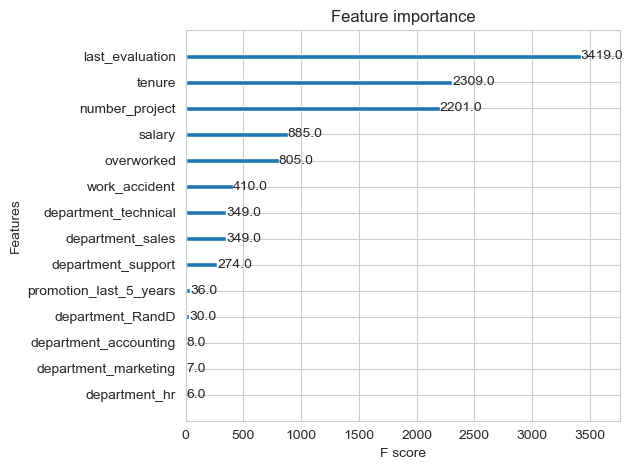

In [222]:
# Plot feature importance to reveal the strong predictors of the target variable
ax = plot_importance(champion_xgb2.best_estimator_)
ax.figure.tight_layout()
ax.figure.savefig('feature_importance.png')

> The plot above shows that `last_evaluation`, `tenure`, `number_project`, `salary`, and `overworked` are the most helpful in predicting the outcome variable `left`. 

### Modeling Round 3: Using Feature Engineering


#### Feature Engineering Round 2
At this point, there is still some concern about data leakage. This round 3 of modeling will focus on how predictions change when the `last_evaluation` feature is removed from the data. In application, it is possible that evaluations are not performed very frequently. More importantly, it is also possible that the evaluation score strongly determines whether an employee leaves or stays. 

In [59]:
# Drop the last_evaluation column
df3 = df2.drop('last_evaluation', axis=1)

,number_project,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
# Inspect the dataset before splitting
df3.describe()

,number_project,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000
mean,3.802852,3.364857,0.154282,0.166041,0.016929,0.60387,0.081394,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714,0.636311
std,1.163238,1.330240,0.361234,0.372133,0.129012,0.63590,0.273451,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004,0.481081
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,4.000000,3.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,5.000000,4.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,7.000000,10.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [62]:
# Select the feature variables
X3 = df3.drop('left', axis=1)
print(X3.info())

# Isolate the outcome variable
y3 = df3['left']

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   number_project          11991 non-null  int64
 1   tenure                  11991 non-null  int64
 2   work_accident           11991 non-null  int64
 3   promotion_last_5_years  11991 non-null  int64
 4   salary                  11991 non-null  int8 
 5   department_IT           11991 non-null  int32
 6   department_RandD        11991 non-null  int32
 7   department_accounting   11991 non-null  int32
 8   department_hr           11991 non-null  int32
 9   department_management   11991 non-null  int32
 10  department_marketing    11991 non-null  int32
 11  department_product_mng  11991 non-null  int32
 12  department_sales        11991 non-null  int32
 13  department_support      11991 non-null  int32
 14  department_technical    11991 non-null  int32
 15  overworked              

In [65]:
# Split the dataset, with different random state number=0
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, 
                                                        stratify=y3, random_state=0)

# Check you train-test sets
for x in [X3_train, X3_test, y3_train, y3_test]:
    print(len(x))

9592
2399
9592
2399


In [66]:
# Initialize the model 
lr3 = LogisticRegression(random_state=42)
dt3 = DecisionTreeClassifier(random_state=42)
rf3 = RandomForestClassifier(random_state=42)
xgb3 = XGBClassifier(objective='binary:logistic', random_state=42)

In [67]:
# Setting up the parameter grids
param_grid_lr3 = [{'penalty' : ['l2', 'none'],
                  'solver' : ['lbfgs','newton-cholesky'],
                  'max_iter' : [1000, 5000]}]

param_grid_dt3 = [{'max_depth': [4, 10, None],
                  'min_samples_leaf': [2, 5, 10],
                  'min_samples_split': [2, 4],
                  'criterion': ["gini", "entropy"]}]

param_grid_rf3 = [{'max_depth': [3, 6, None], 
                  'max_features': [1.0],
                  'max_samples': [0.7, 1.0],
                  'min_samples_leaf': [1, 3],
                  'min_samples_split': [2,4],
                  'n_estimators': [300, 500]}]

param_grid_xgb3 = [{'max_depth': [5, 10, None],
                   'min_child_weight': [2, 3, 5], 
                   'learning_rate': [0.01, 0.1],
                   'n_estimators': [300, 500]}]

In [68]:
# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs3 = {}
inner_cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for pgrid, est, name in zip((param_grid_lr3, param_grid_dt3, param_grid_rf3, param_grid_xgb3),
                            (lr3, dt3, rf3, xgb3),
                            ('LogReg', 'DTree', 'RForest', 'XGBoost')):
    gcv3 = GridSearchCV(estimator=est,
                        param_grid=pgrid,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        n_jobs=-1,
                        cv=inner_cv3,
                        verbose=0,
                        refit='roc_auc')
    gridcvs3[name] = gcv3

In [69]:
outer_cv3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, gs_est in sorted(gridcvs3.items()):
    scores_dict3 = cross_validate(gs_est,
                                 X=X3_train,
                                 y=y3_train,
                                 scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                 cv=outer_cv3,
                                 return_estimator=True,
                                 n_jobs=-1)

    print(50 * '-', '\n')
    print('Algorithm:', name)
    print('      Inner loop:')

    for i in range(scores_dict3['test_roc_auc'].shape[0]):
        
        print('\n        Best ROC-AUC (avg. of inner test folds) %.2f%%' % (scores_dict3['estimator'][i].best_score_ * 100))
        print('        Best parameters:', scores_dict3['estimator'][i].best_estimator_)
        print('        ROC-AUC (on outer test fold) %.2f%%' % (scores_dict3['test_roc_auc'][i] * 100))

    print('\n%s | OUTER ROC-AUC %.2f%% +/- %.2f' % 
          (name, scores_dict3['test_roc_auc'].mean() * 100, 
           scores_dict3['test_roc_auc'].std() * 100))
    print(pd.DataFrame({'model': [name],
                        'precision': [scores_dict3['test_precision'].mean()],
                        'recall': [scores_dict3['test_recall'].mean()],
                        'F1': [scores_dict3['test_f1'].mean()],
                        'accuracy': [scores_dict3['test_accuracy'].mean()],
                        'roc_auc': [scores_dict3['test_roc_auc'].mean()]
                        }))

-------------------------------------------------- 

Algorithm: DTree
      Inner loop:

        Best ROC-AUC (avg. of inner test folds) 94.64%
        Best parameters: DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)
        ROC-AUC (on outer test fold) 95.49%

        Best ROC-AUC (avg. of inner test folds) 94.48%
        Best parameters: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       random_state=42)
        ROC-AUC (on outer test fold) 95.28%

        Best ROC-AUC (avg. of inner test folds) 95.38%
        Best parameters: DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)
        ROC-AUC (on outer test fold) 94.43%

        Best ROC-AUC (avg. of inner test folds) 95.23%
        Best parameters: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       random_state=42)
        ROC-AUC (on outer test fold) 94.36%

        Best ROC-AUC (avg. of inner test folds) 94.

> The evaluation scores (from the outer loop) of the XGBoost model are generally better than those of Logistic regression, Decision tree, and Random forest models. Consistently, the **XGBoost model** outperforms the other models during the first, second, and this last round of modeling. 

In [75]:
# Train the champion model using the whole train set
champion_xgb3 = GridSearchCV(estimator=xgb3,
                            param_grid=param_grid_xgb3,
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            n_jobs=-1,
                            cv=5,
                            verbose=1,
                            refit='roc_auc')

In [76]:
%%time
champion_xgb3.fit(X3_train, y3_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 2.36 s
Wall time: 35.7 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'max_depth': [5, 10, None],
                          'min_child_weight': [2, 3, 5],
                          'n_estimators': [300, 500]}],
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [77]:
# Pickle the champion model
write_pickle(path, champion_xgb3, 'champion_xgb_round3')

In [230]:
# Read the pickle
champion_xgb3 = read_pickle(path, 'champion_xgb_round3')

In [231]:
# Display the best roc-auc sscore
champion_xgb3.best_score_

0.9636668035622385

In [232]:
# Display the best parameters
champion_xgb3.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 500}

In [226]:
# Get the results of the training
xgb3_results = make_results('XGBoost_3 val', champion_xgb3, 'roc_auc')
xgb3_results

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_3 val,0.814542,0.849956,0.831694,0.942869,0.963667


In [227]:
# Get the results of the testing
XGB3_test_scores = get_scores('XGBoost_3 test', champion_xgb3, X3_test, y3_test)
XGB3_test_scores

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_3 test,0.788863,0.854271,0.820265,0.937891,0.904397


In [228]:
# Compare the current vs the previous XGBoost score/s
results = pd.concat([results, xgb3_results, XGB3_test_scores], axis=0)
results

,model,precision,recall,f1,accuracy,roc_auc
0,XGBoost_1 val,0.975087,0.909600,0.941141,0.981130,0.985968
0,XGBoost_1 test,0.971053,0.927136,0.948586,0.983326,0.960819
0,XGBoost_2 val,0.907089,0.893279,0.900028,0.967056,0.973787
0,XGBoost_2 test,0.891960,0.891960,0.891960,0.964152,0.935235
0,XGBoost_3 val,0.814542,0.849956,0.831694,0.942869,0.963667
0,XGBoost_3 test,0.788863,0.854271,0.820265,0.937891,0.904397


> During the last round of modeling, the evaluation scores fell significantly, which is to be expected given that fewer features were taken into account. Still, the scores are quite good. Also, the set of features that were used during this round will surely be available during the actual use of the model, making this last modeling effort the most realistic model and therefore the one that should be used. 

# **pacE: Execute Stage**
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

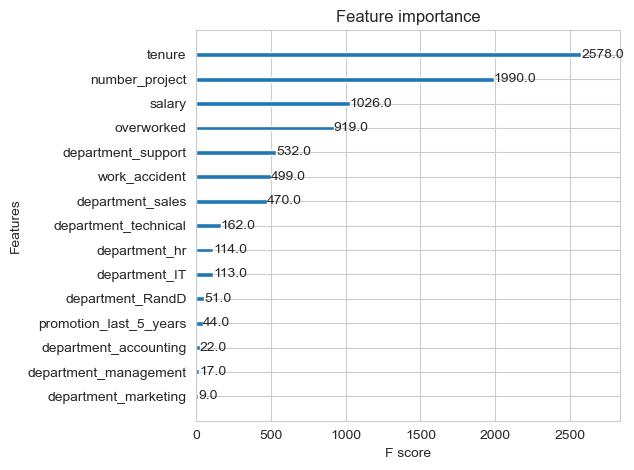

In [233]:
# Plot feature importance of the champion model
ax = plot_importance(champion_xgb3.best_estimator_)
ax.figure.tight_layout()
ax.figure.savefig('feature_importance_3.png')

> The plot above shows that `tenure`, `number_project`, `salary`, and `overworked` are the most helpful in predicting whether an employee will leave or stay in the company.

##### Plot a confusion matrix to visualize how well the final model predicts on the test set.

In [234]:
# Create a confusion matrix
xgb3_test_preds = champion_xgb3.best_estimator_.predict(X3_test)

array([1, 0, 0, ..., 0, 0, 0])

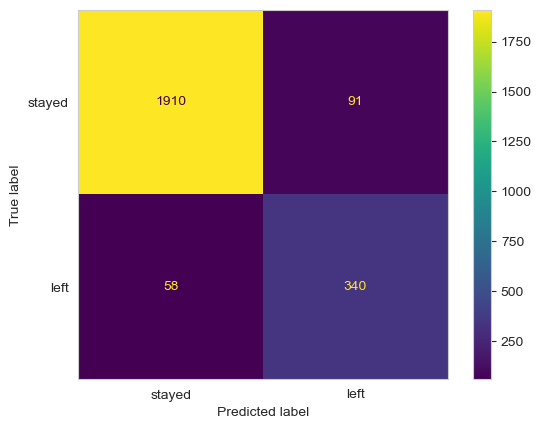

In [235]:
cm = confusion_matrix(y3_test, xgb3_test_preds, labels=champion_xgb3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels = ['stayed', 'left'])

disp.plot()
plt.grid(None)
plt.savefig('Confusion_Matrix_xgb3.png')

> The model tends to predict more false positives (91) than false negatives (58). This shows that the model may identify that some employees will leave the company when, in reality, they will stay.
>   
> Regardless of this tendency, it is important to emphasize that the model is still a reliable tool for understanding and developing a solution to employee turnover. 

### Summary of model results 
The data leakage issue was addressed, and actions were taken to minimize its effect: a model with an unrealistic evaluation score that is not replicated during production. To develop a realistic model, fewer features that would be legitimately available during the actual use of the model were taken into account. Also, features that are highly correlated to the target variable were eliminated or transformed. 

After conducting feature engineering, the extreme gradient boosting (XGBoost) was chosen as the champion model. On the test set, it achieved an AUC score of 90.43%, which means that the model is highly capable of distinguishing between employees who will leave or stay in the company. Also, the model is a reliable tool for identifying the influential factors behind employee departure and, therefore, a valuable tool for HR in increasing employee retention. 

## **Conclusion and Recommendations**

The results of exploratory data analysis, the modeling effort, and the plot of feature importance extracted from the model show that employees at Salifort Motors are overworked.

To improve employee retention, consider the following recommendations:
* According to Gallup, about 80% of employees who felt criticized or unmotivated after a performance review started to look for a new job. That is why a more standardized evaluation review is important. Consider making the evaluation review a collaborative and dynamic process that seeks to better the relationship between an employee and a manager. 
  
* Reward and recognize employees who contribute more or put in more effort. For instance, either reward employees for working longer hours, or don't require them to do so. 
  
* Set a limit on the number of projects that employees can work on and regularly check in with employees to ensure they are not overworked and address any issues promptly.

* Consider promoting employees who have been with the company for at least four years, or conduct further inquiry about why four-year tenured employees are so dissatisfied.

* Regularly benchmark salaries against industry standards to ensure competitiveness. 
  
* Conduct company-wide and team-specific discussions to understand and assess the company work culture both generally and in specific contexts.

* Regularly conduct employee engagement surveys to gather feedback and identify areas for improvement

**Next Steps**
* For another project, building a K-means model on this dataset and analyzing the cluster might yield valuable insights. 